## Lab3: Wide data and linear models

### Darian Yang

You are provided with a dataset for 554 patients, 80% (444 patients) of the dataset was selected to be the training set, and 20% (110 patients) as the test set. Features and labels of the training set can be found in train_X.csv, train_y.csv respectively. Features of the test set can be found in test_X.csv while labels are hidden.

Your task is to predict the disease type (phenotype) from transcriptomics data. Disease: UCEC (uterine corpus endometrial carcinoma). Labels (1/0) are encoding tumor grade “II-” vs. “III+”

### Specific tasks:
* Please use binary classification (0/1) using linear models. 
* Measure the classification performance using accuracy and [F1-score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) on the given validation set. Please report averaged values.
* Develop a pipeline to try different [linear models](https://scikit-learn.org/stable/modules/linear_model.html) (linear regression, logistic regression, Ridge regression, LASSO, etc.)
* Study the effect of regularization parameters on model performance. What model is the best?
* Compare your best model accuracy with random guessing (Hint: scramble labels aka Y-randomization)
* What are the top important genes for the model decision?
* Try to visualize the dataset and see if you could visually separate two groups of patients

### Bonus Qs:
You could use https://www.uniprot.org/Links to an external site, and search for Gene IDs. See if there is a meaningful connection between the top 10 most important genes and disease. Did your model recapitulate of the known association between Genes and Disease?

### Evaluation
The evaluation metric for this competition is Mean F1-Score. The F1 score, commonly used in information retrieval, measures accuracy using the statistics precision and recall.

The F1 metric weights recall and precision equally, and a good retrieval algorithm will maximize both precision and recall simultaneously. Thus, moderately good performance on both will be favored over extremely good performance on one and poor performance on the other.

#### Submission Format
Your submission should be your predictions on given features in test_X.csv
Your submission should contain only two columns, the ID and the predicted label.
Please include the header "ID" and "xml_neoplasm_histologic_grade" so that Kaggle can read your submission
https://www.kaggle.com/competitions/38615hw3/overview/description

```
ID,xml_neoplasm_histologic_grade
1,1
```

#### Important note:
Kaggle randomly separated the test set to two parts: public test and private test, in this homework the test set was separately evenly with no intersection. The split is fixed but not visible. Once you have submitted your prediction, Kaggle will show the accuracy of your prediction on the public part of the test set immediately, while the accuracy on the private part of the test set will be hidden until the end of this homework. This means your final accuracy and rank is not necessarily the same as you can see during the competition

### Dataset Description
train_X.csv
* Features of 444 patients in the training set, the first column are ID

train_y.csv
* Labels of 444 patients in the training set(all boolean values), the first column are ID

test_X.csv
* Features of 110 patients in the test set, the first column are ID

### Let's start with some exploration of the data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
train_x = pd.read_csv("train_X.csv")
#train_x = pd.read_csv("train_X.csv", index_col=0)
train_y = pd.read_csv("train_y.csv")
test_x = pd.read_csv("test_X.csv")
#test_x = pd.read_csv("test_X.csv", index_col=0)

In [4]:
train_x

,Unnamed: 0,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000282651,ENSG00000282815,ENSG00000282939,ENSG00000283063,ENSG00000283439,ENSG00000283463,ENSG00000283526,ENSG00000283586,ENSG00000283632,ENSG00000283697
0,EB0D68BC-5FF9-44A5-A355-CA5441BFBA0A,7.062725,0.026623,6.720413,5.449267,3.868619,4.587771,7.165112,4.643161,6.771731,...,0.325987,-5.545564,-5.545564,-5.545564,-5.545564,4.014351,4.841392,-5.545564,5.855893,3.618253
1,0876B4BB-58BA-4C4C-84F4-E9D19EF96147,5.965392,-5.431256,6.358498,4.161479,4.585293,4.326924,6.849703,4.391534,5.819945,...,5.910874,-0.945029,3.750430,1.611211,-0.498573,3.430928,3.160435,-5.431256,4.413930,3.353496
2,EACD1021-7B52-4531-8806-B7555B73AC84,7.892221,-5.851870,8.132992,5.986320,5.422599,4.728815,8.168477,6.289562,7.331591,...,10.103565,-5.851870,6.498217,5.481945,-5.851870,5.137298,4.296777,-5.851870,5.345372,5.028567
3,368ACD26-C7FB-4974-BB7F-0AE22670CB0E,6.826546,0.964851,5.998280,4.991435,4.963000,4.977695,7.149421,4.570863,6.008286,...,2.442099,-5.994056,2.862038,1.909955,0.568120,4.768694,3.983207,-5.994056,4.609411,4.329472
4,F23B0A1A-25AE-41D9-8C49-B692C4FDE1E4,7.059095,2.429954,6.746639,5.591316,5.111120,5.972938,7.576201,6.032083,6.470761,...,5.553223,-5.870484,3.044916,-5.870484,0.018320,4.640575,4.954957,-5.870484,4.620774,4.464277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,D4276C6F-9F0F-4F74-A85E-1E54272ADDED,7.009917,0.088022,6.814481,4.685804,3.039239,4.373218,6.826167,5.101784,6.327076,...,5.244168,-5.619018,3.953899,-5.619018,-0.021027,4.055201,3.052880,-5.619018,4.560183,3.889471
440,375C6EA2-4747-4959-9630-771FB8461BF1,4.772186,-5.062627,7.064273,5.505659,5.769194,4.307329,6.576986,4.018168,5.453594,...,6.641965,-0.284152,4.238647,5.431223,0.785492,3.489883,-5.062627,-5.062627,4.467892,3.335732
441,AE8BD116-5550-4A0F-BEBE-F092675A1F45,7.741897,1.467622,6.547112,4.994184,5.273657,6.069989,7.170169,5.740295,6.115446,...,5.963416,-5.380528,4.411300,2.265077,-5.380528,4.727461,4.502798,-5.380528,4.102909,4.326804
442,3762BBD4-190F-4DE4-91E6-0C483D066B82,5.774051,-6.793718,7.218590,5.477760,5.042350,3.700158,7.349451,4.573089,6.003810,...,6.036861,-6.793718,3.605128,2.503595,-6.793718,3.401223,4.962133,-6.793718,3.864213,3.200419


In [5]:
train_y

,Unnamed: 0,xml_neoplasm_histologic_grade
0,EB0D68BC-5FF9-44A5-A355-CA5441BFBA0A,0
1,0876B4BB-58BA-4C4C-84F4-E9D19EF96147,1
2,EACD1021-7B52-4531-8806-B7555B73AC84,0
3,368ACD26-C7FB-4974-BB7F-0AE22670CB0E,0
4,F23B0A1A-25AE-41D9-8C49-B692C4FDE1E4,1
...,...,...
439,D4276C6F-9F0F-4F74-A85E-1E54272ADDED,1
440,375C6EA2-4747-4959-9630-771FB8461BF1,1
441,AE8BD116-5550-4A0F-BEBE-F092675A1F45,1
442,3762BBD4-190F-4DE4-91E6-0C483D066B82,0


In [6]:
test_x

,Unnamed: 0,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000282651,ENSG00000282815,ENSG00000282939,ENSG00000283063,ENSG00000283439,ENSG00000283463,ENSG00000283526,ENSG00000283586,ENSG00000283632,ENSG00000283697
0,1576BB97-F8EA-48FF-9494-EBC7A0C97312,7.503849,1.685440,8.090089,5.546588,3.412025,5.871539,8.395029,5.894996,6.313896,...,3.626396,-2.640463,-7.278265,0.721287,-7.278265,4.672536,5.153675,-7.278265,4.843800,4.302864
1,63F4281A-4D90-4589-879E-549097FB3459,6.112919,-5.425877,5.604743,4.248246,3.374033,3.370075,6.804015,4.646287,6.236134,...,-5.425877,-2.143410,1.956699,1.377768,-5.425877,4.560829,3.735085,-5.425877,4.105789,4.803357
2,74CF740D-201D-4070-99B9-F007E7C4D472,6.183846,1.217355,6.093903,4.403216,5.722867,6.123209,7.680258,4.983386,5.626569,...,11.317818,-5.259782,5.093316,3.800607,-5.259782,4.966710,2.829487,-5.259782,5.118704,5.024979
3,1329E1C1-743E-4541-9081-165572D4BF47,6.325535,-0.197432,6.722632,4.509093,4.941256,3.700171,7.492606,5.031053,5.859242,...,3.536141,-1.362703,3.480703,0.776383,-0.999629,4.794226,-5.399485,-5.399485,4.660878,4.684343
4,88BBA1BF-44E0-416E-A028-04F410A3FE5D,7.162383,-5.539710,6.186110,5.270282,5.412103,3.781568,7.285779,4.847552,6.337205,...,5.112772,-5.539710,4.369268,2.927849,0.791397,4.542333,4.628775,-5.539710,4.812787,4.524834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,638A0BBA-E2BE-449C-8BF5-EC07F765200C,6.949029,2.192625,7.613706,5.131517,4.292879,5.337764,7.668408,5.159289,5.645662,...,5.515318,-5.785898,4.229114,2.875184,-0.303496,3.322246,3.683199,-5.785898,4.730559,3.251810
106,FD3BD018-3B83-4689-BC70-CE6E98F83790,7.419322,0.472349,6.723539,5.176782,4.297442,4.591905,7.171547,6.693665,5.782247,...,2.737453,-1.781791,3.509502,0.021815,-6.758708,4.684549,4.795272,-6.758708,4.234056,4.614238
107,739BEBEA-F6CC-4827-81D4-28102A8B774B,7.135800,0.479097,7.051451,6.042828,4.523706,7.250545,7.577726,5.622388,6.447874,...,5.951147,-5.960456,4.025253,2.785925,-5.960456,4.236003,5.597498,-5.960456,5.279498,3.813894
108,5F86DB7A-1906-4E2F-BD50-0AEE3C80B17D,6.859635,2.159767,7.254992,4.900402,4.256251,6.503227,6.810730,6.036136,6.282137,...,4.462337,-5.553034,4.325258,2.593648,-5.553034,4.727639,2.380364,-5.553034,5.523681,4.088765


So the goal is basically to make test_y.csv and submit that to Kaggle.

Let's see what some of the training features look like.

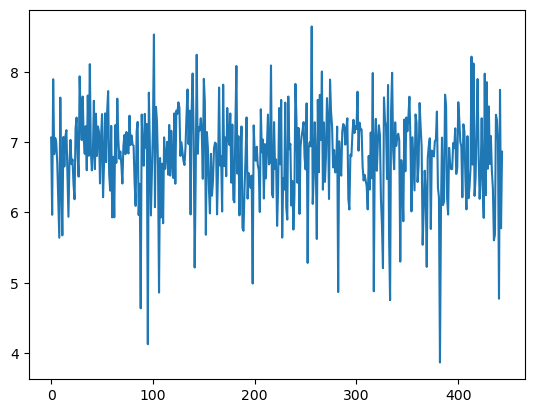

In [7]:
plt.plot(train_x.iloc[:,1])

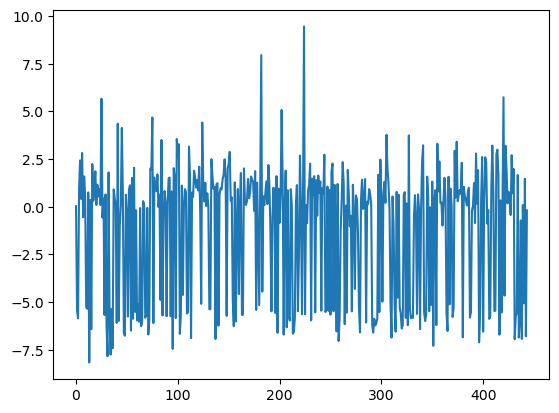

In [8]:
plt.plot(train_x.iloc[:,2])

All of the transcriptomics data is from the same NGS source, so standardization probably isn't needed.

In [9]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Columns: 17971 entries, Unnamed: 0 to ENSG00000283697
dtypes: float64(17970), object(1)
memory usage: 60.9+ MB


### Okay, time to try some linear models for classification

#### Starting with linear regression

In [10]:
from sklearn import linear_model

/ihome/lchong/dty7/Apps/anaconda3/envs/ml/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [192]:
reg = linear_model.LinearRegression()
reg.fit(train_x.iloc[:,1:], train_y.iloc[:,1])

LinearRegression()

In [196]:
reg.coef_

array([-3.93405621e-05,  1.49629405e-03,  1.16555574e-04, ...,
        5.41185914e-04, -2.18453615e-04, -5.37322608e-05])

In [13]:
np.max(reg.coef_**2)

9.255458440830084e-06

In [14]:
reg_predict = reg.predict(test_x.iloc[:,1:])

In [15]:
reg_predict

array([ 1.05578295,  0.11539403,  0.32192742,  0.89983238,  0.17960874,
        0.74842117,  0.63349951,  0.34066975,  0.75114878,  0.46135573,
        0.74324628,  0.62798531,  0.67925027,  0.25950583, -0.04462914,
        0.77915949,  0.97438076,  0.22297767,  1.01979209,  0.97065092,
        0.7715435 ,  0.82644917,  0.17109694,  0.9799458 ,  1.00041889,
        0.98549137,  1.17933538,  1.32954207,  0.79906788,  0.82260134,
        0.70597798,  0.1340969 , -0.07803376,  0.6601102 ,  0.02353493,
        0.30685183,  0.70238629,  0.79815023,  0.75082677,  1.05771615,
        0.76832494,  0.94805617,  0.24345249, -0.01742159,  0.06688572,
        0.81648435,  0.8771865 ,  0.55446727,  0.07775324,  0.99974426,
        0.88792646,  0.89179216,  0.1977811 ,  1.04394588,  0.13159959,
        0.53274592,  0.52639972,  0.03499448,  0.80934789,  0.86094356,
        1.06751014,  0.93507565,  0.35997553,  0.44505627,  0.72709668,
        0.20911243,  1.09506611,  1.03951118,  0.4828468 ,  0.81

In [16]:
# transform to binary classifiers
reg_predict_binary = np.where(reg_predict > 0.5, 1, 0)
reg_predict_binary

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1])

In [17]:
reg_predict_binary.shape

(110,)

In [18]:
#from sklearn import metrics
# y_true, y_pred
#metrics.f1_score(test_y[])

I forgot, I don't have the test_y dataset so I can't calculate the f1-score myself (or can I?).

I don't think that a linear regression based model will work very well since some of the data is centered around a single value. Let's submit and see.

In [19]:
test_x.iloc[:,0].values.shape

(110,)

In [20]:
def kaggle_csv(data, filename="model_y.csv"):
    """Create the correctly formatted submission csv for kaggle."""
    data = np.column_stack((test_x.iloc[:,0].values, data))
    np.savetxt(filename, data, fmt=("%s","%d"), 
               header="ID,xml_neoplasm_histologic_grade", 
               delimiter=",", comments="")

In [21]:
kaggle_csv(model_y)

NameError: name 'model_y' is not defined

On kaggle, I got an f1-score of 0.86153 for this submission.

That was with a manual submission, let's see how the api command works.

In [ ]:
#! kaggle competitions submit -c 38615hw3 -f "model_y.csv" -m "Testing of the kaggle api"

#### Next, logistic regression

This should work better since the output is binary.

In [ ]:
logr = linear_model.LogisticRegression().fit(train_x.iloc[:,1:], train_y.iloc[:,1])

In [ ]:
logr_predict = logr.predict(test_x.iloc[:,1:])

In [ ]:
kaggle_csv(logr_predict)

This submission scored 0.87499, a small improvement.

Seems like logr defaults to l2 regularization, let's try elastic net (l1 and l2).

In [23]:
logr_em = linear_model.LogisticRegression(penalty="elasticnet", solver="saga", l1_ratio=0.5).fit(train_x.iloc[:,1:], train_y.iloc[:,1])

/ihome/lchong/dty7/Apps/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [24]:
logr_em_predict = logr_em.predict(test_x.iloc[:,1:])

In [25]:
kaggle_csv(logr_em_predict)

This submission also scored 0.87499, so no change from before.

What about l1?

In [249]:
logr = linear_model.LogisticRegression(penalty="l1", solver="liblinear").fit(train_x.iloc[:,1:], train_y.iloc[:,1])
logr_predict = logr.predict(test_x.iloc[:,1:])

In [250]:
kaggle_csv(logr_predict)

This was worse, with a score of 0.81967.

### My own f1 scoring

I don't want to keep submitting to see the f1 score, so I will implement my own scoring and split the training data 60/40. I will also scale the data using a standard scaler.

In [26]:
import sklearn

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_x.iloc[:,1:])
train_x_scaled = scaler.transform(train_x.iloc[:,1:])
scaler.fit(test_x.iloc[:,1:])
test_x_scaled = scaler.transform(test_x.iloc[:,1:])

In [211]:
X_train, X_test, y_train, y_test = \
sklearn.model_selection.train_test_split(train_x_scaled, train_y.iloc[:,1:].values, test_size=0.4)

In [212]:
X_train

array([[ 1.25656133, -1.21557735, -0.45343274, ...,  0.0383133 ,
         0.33904467,  0.75773297],
       [-0.82745184,  0.68475184, -0.40835341, ...,  3.34809917,
         1.17292313,  0.31021817],
       [ 0.3098044 ,  0.57388345, -0.8677629 , ..., -0.02995046,
         1.02251718,  0.99807842],
       ...,
       [ 0.75933692, -1.17090312,  0.76482241, ...,  0.12058356,
         1.73041091, -1.09128987],
       [ 0.50206098, -1.22617591,  1.12209441, ...,  0.01879543,
         1.60597233,  0.6152128 ],
       [-1.07495992, -1.04451198, -0.50171585, ...,  0.3533404 ,
         0.9695291 ,  0.60881712]])

In [210]:
X_test

array([[ 1.66904928,  0.38289109,  1.58341654, ..., -0.14736257,
        -0.29010119,  0.60695782],
       [ 1.43488901,  0.78068918, -0.49383668, ...,  0.09422225,
        -0.26409632,  0.50645347],
       [ 0.46964761, -1.43149965,  0.88196663, ..., -0.3593205 ,
        -0.0196051 ,  0.09868941],
       ...,
       [-0.57336785, -1.19471798,  0.68171314, ...,  0.07672708,
        -0.36431913,  0.66859813],
       [-1.06710376,  0.75953964,  0.24183993, ..., -0.48712493,
        -0.24477297,  0.47644598],
       [-0.27441462, -1.20511665,  0.9264115 , ...,  0.05757731,
         0.6226463 , -0.12018006]])

Test using logr

In [222]:
y_test = y_test.reshape(-1)
y_train = y_train.reshape(-1)

In [223]:
y_train

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0])

In [58]:
#from sklearn.pipeline import make_pipeline
#pipe = make_pipeline(StandardScaler(), linear_model.LogisticRegression(max_iter=300))
#pipe.fit(X_train, y_train.values.reshape(-1)) 

In [224]:
logr = linear_model.LogisticRegression(max_iter=300).fit(X_train, y_train)

In [225]:
y_predict = logr.predict(X_test)

In [226]:
sklearn.metrics.f1_score(y_test, y_predict)

0.8316831683168316

In [227]:
logr.score(X_test, y_test)

0.8089887640449438

Lets see how this model fares with kaggle and the full dataset.

In [66]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), linear_model.LogisticRegression(max_iter=300))
pipe.fit(train_x.iloc[:,1:], train_y.iloc[:,1]) 
logr_predict = pipe.predict(test_x.iloc[:,1:])
kaggle_csv(logr_predict)

Interesting, the score is 0.86153.

#### How about ridge regression (L2)?

First need to find a good alpha value.

In [228]:
regr_cv = linear_model.RidgeCV(alphas=np.arange(1, 100000, 100))
#regr_cv = linear_model.RidgeCV(alphas=np.arange(2000, 3000, 1))
#regr_cv = linear_model.RidgeCV(alphas=np.arange(2400, 2500, 0.1))
#regr_cv = linear_model.RidgeCV(alphas=np.logspace(-3, -1, 30))
#regr_cv = linear_model.RidgeCV()

In [167]:
model_cv = regr_cv.fit(train_x_scaled, train_y.iloc[:,1])

In [168]:
model_cv.alpha_

0.1

In [169]:
model_cv.best_score_

-0.12974830754703273

This value may be good?

In [197]:
reg = linear_model.Ridge(alpha=model_cv.alpha_)

In [198]:
reg.fit(train_x_scaled, train_y.iloc[:,1])

Ridge(alpha=0.1)

In [199]:
y_predict = reg.predict(test_x_scaled)

In [173]:
y_predict = np.where(y_predict > 0.5, 1, 0)
y_predict

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1])

In [174]:
kaggle_csv(y_predict)

I got 0.87878 with alpha=2400. I further optimized alpha to 2441.5, this scored the same, not too surprisingly.

These values feel too large though, what about alpha=0.1? This scored 0.86567.

#### What about LASSO (L1)?

LASSO is good for wide data (features (p) > observation (n)), so should be good for this dataset.

LASSO also needs to tune a hyperparameter ($\alpha$).

In [175]:
reg = linear_model.LassoCV().fit(train_x_scaled, train_y.iloc[:,1])

In [176]:
reg.alpha_

0.028764489798114024

In [177]:
lasso = linear_model.Lasso(alpha=reg.alpha_)
lasso.fit(train_x_scaled, train_y.iloc[:,1])

Lasso(alpha=0.028764489798114024)

In [178]:
y_predict = lasso.predict(test_x_scaled)

In [179]:
y_predict

array([ 1.01447275,  0.22845317,  0.3185323 ,  0.83427353,  0.30022536,
        0.74056379,  0.76269977,  0.15319795,  0.37310524,  0.27671007,
        0.7149602 ,  0.54045781,  0.61950634,  0.39877643, -0.14815646,
        0.76822118,  0.89846706,  0.4881715 ,  0.86356885,  0.8647341 ,
        0.85059419,  1.03860144,  0.47764525,  0.9863982 ,  0.76724517,
        1.23322579,  0.95975008,  0.66465841,  0.90486078,  0.74786789,
        0.70325734,  0.17893921,  0.19196864,  0.59741182,  0.02331944,
        0.48539538,  0.66531029,  0.94336091,  0.53861498,  1.10968666,
        0.86083386,  0.93210951,  0.18283221,  0.16505982,  0.15451153,
        1.10401074,  0.70838148,  0.70651666,  0.31379937,  0.81560241,
        0.79924867,  0.68549651,  0.31010554,  0.77648765,  0.00940202,
        0.35326551,  0.62817107,  0.2255686 ,  0.78143834,  1.00401011,
        0.75617906,  0.95195078,  0.24323411,  0.34305229,  0.80006307,
        0.37702856,  1.01182575,  0.77927393,  0.40542236,  0.95

In [181]:
y_predict = np.where(y_predict > 0.5, 1, 0)
y_predict

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1])

In [182]:
kaggle_csv(y_predict)

Surprisingly only scored 0.84375.

#### Finally let's try elastic nets (L1 and L2)

Now we need to optimize 2 parameters, alpha and the ratio of l1 to l2.

In [183]:
encv = linear_model.ElasticNetCV().fit(train_x_scaled, train_y.iloc[:,1])

In [184]:
encv.alpha_

0.057528979596228054

In [185]:
encv.l1_ratio_

0.5

In [186]:
en = linear_model.ElasticNet(alpha=encv.alpha_, l1_ratio=encv.l1_ratio_)
en.fit(train_x_scaled, train_y.iloc[:,1])

ElasticNet(alpha=0.057528979596228054)

In [187]:
y_predict = en.predict(test_x_scaled)

In [189]:
y_predict = np.where(y_predict > 0.5, 1, 0)
y_predict

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1])

In [190]:
kaggle_csv(y_predict)

I scored 0.84375 with this, interesting, no change from lasso.

Overall, the best regularization method was using ridge regression, which isn't what I expected, as I thought lasso would be best for wide data. Maybe I need to use lasso to get rid of some features?

### Same thing but with my own 60/40 split

In [236]:
def score_y(model, make_binary=True):
    """
    Print the scores for the y_predict.
    """
    y_predict = model.fit(X_train, y_train).predict(X_test)
    if make_binary:
        y_predict = np.where(y_predict > 0.5, 1, 0)
    f1 = sklearn.metrics.f1_score(y_test, y_predict)
    r2 = model.score(X_test, y_test)
    print(f"f1-score: {f1} \nR^2: {r2}")

In [237]:
regr_cv = linear_model.RidgeCV(alphas=np.arange(1, 100000, 100))

In [238]:
model_cv = regr_cv.fit(X_train, y_train)

In [239]:
model_cv.alpha_

5301

In [240]:
model = linear_model.Ridge(alpha=model_cv.alpha_)

In [241]:
score_y(model)

f1-score: 0.8457711442786069 
R^2: 0.40768362603070785


In [242]:
model_cv = linear_model.LassoCV().fit(X_train, y_train)

In [243]:
lasso = linear_model.Lasso(alpha=model_cv.alpha_)

In [245]:
score_y(lasso)

f1-score: 0.8039215686274509 
R^2: 0.3178630899763384


In [246]:
encv = linear_model.ElasticNetCV().fit(X_train, y_train)

In [251]:
net = linear_model.ElasticNet(alpha=encv.alpha_, l1_ratio=encv.l1_ratio_)

In [252]:
score_y(net)

f1-score: 0.7920792079207922 
R^2: 0.33049337037115467


In [254]:
lr = linear_model.LinearRegression().fit(X_train, y_train)

In [255]:
score_y(lr)

f1-score: 0.8282828282828283 
R^2: 0.4131895403160385


Not surprisingly, these scores are similar to my kaggle submission scores.

And the regularization methods don't really improve upon a basic linear regression model.

Let's try dropping some features using lasso, then running with ridge.

In [253]:
lasso.n_features_in_

17970

### Now time to compare my best model accuracy with random guessing
*(Hint: scramble labels aka Y-randomization)*

### What are the top important genes for my model decisions?

### Time to try to visualize the dataset and try to visually separate two groups of patients

### Bonus Q:
You could use https://www.uniprot.org/Links to an external site, and search for Gene IDs. See if there is a meaningful connection between the top 10 most important genes and disease. Did your model recapitulate of the known association between Genes and Disease?